# Machine Learning Project: Personality Classification
# Objective/Question:
The project aims to classify individuals as either Introvert or Extrovert based on various behavioral and social features.
# Dataset:
•	5,000 entries, 8 columns
•	Features: time spent alone, stage fright, social event attendance, etc.
•	Target variable: 'Personality' (Introvert/Extrovert)


# Machine Learning Project: Personality Classification
1. Prepare Problem
a) Load libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('fivethirtyeight')
sns.set_palette("husl")
%matplotlib inline

b) Load dataset

In [115]:
# Load the dataset
df = pd.read_csv("C:/Users/Iman/Downloads/archive (7)/personality_dataset.csv")

# Display first few rows
print("Dataset Preview:")
display(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

Dataset Preview:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB
None


# Insights:

Dataset contains 5000 entries with 8 columns

Features include time spent alone, stage fear, social event attendance, etc.

Target variable is 'Personality' (Introvert/Extrovert)

No missing values detected

# 2. Summarize Data
a) Descriptive statistics

In [116]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe().T)

# Check for class distribution
print("\nClass Distribution:")
print(df['Personality'].value_counts())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,5000.0,4.9690,3.033922,0.0,3.0,5.0,7.0,11.0
Social_event_attendance,5000.0,4.9952,2.862449,0.0,3.0,5.0,7.0,10.0
Going_outside,5000.0,3.5234,2.088618,0.0,2.0,4.0,5.0,7.0
Friends_circle_size,5000.0,7.2532,4.045783,0.0,5.0,7.0,10.0,15.0
Post_frequency,5000.0,4.7598,2.780369,0.0,3.0,5.0,7.0,10.0



Class Distribution:
Personality
Introvert    2502
Extrovert    2498
Name: count, dtype: int64

Missing Values:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


# Insights:

Balanced dataset with 2502 Introverts and 2498 Extroverts

All numerical features show reasonable distributions

No missing values in any column

Social_event_attendance ranges from 0-10, Friends_circle_size from 0-15

# b) Data visualizations

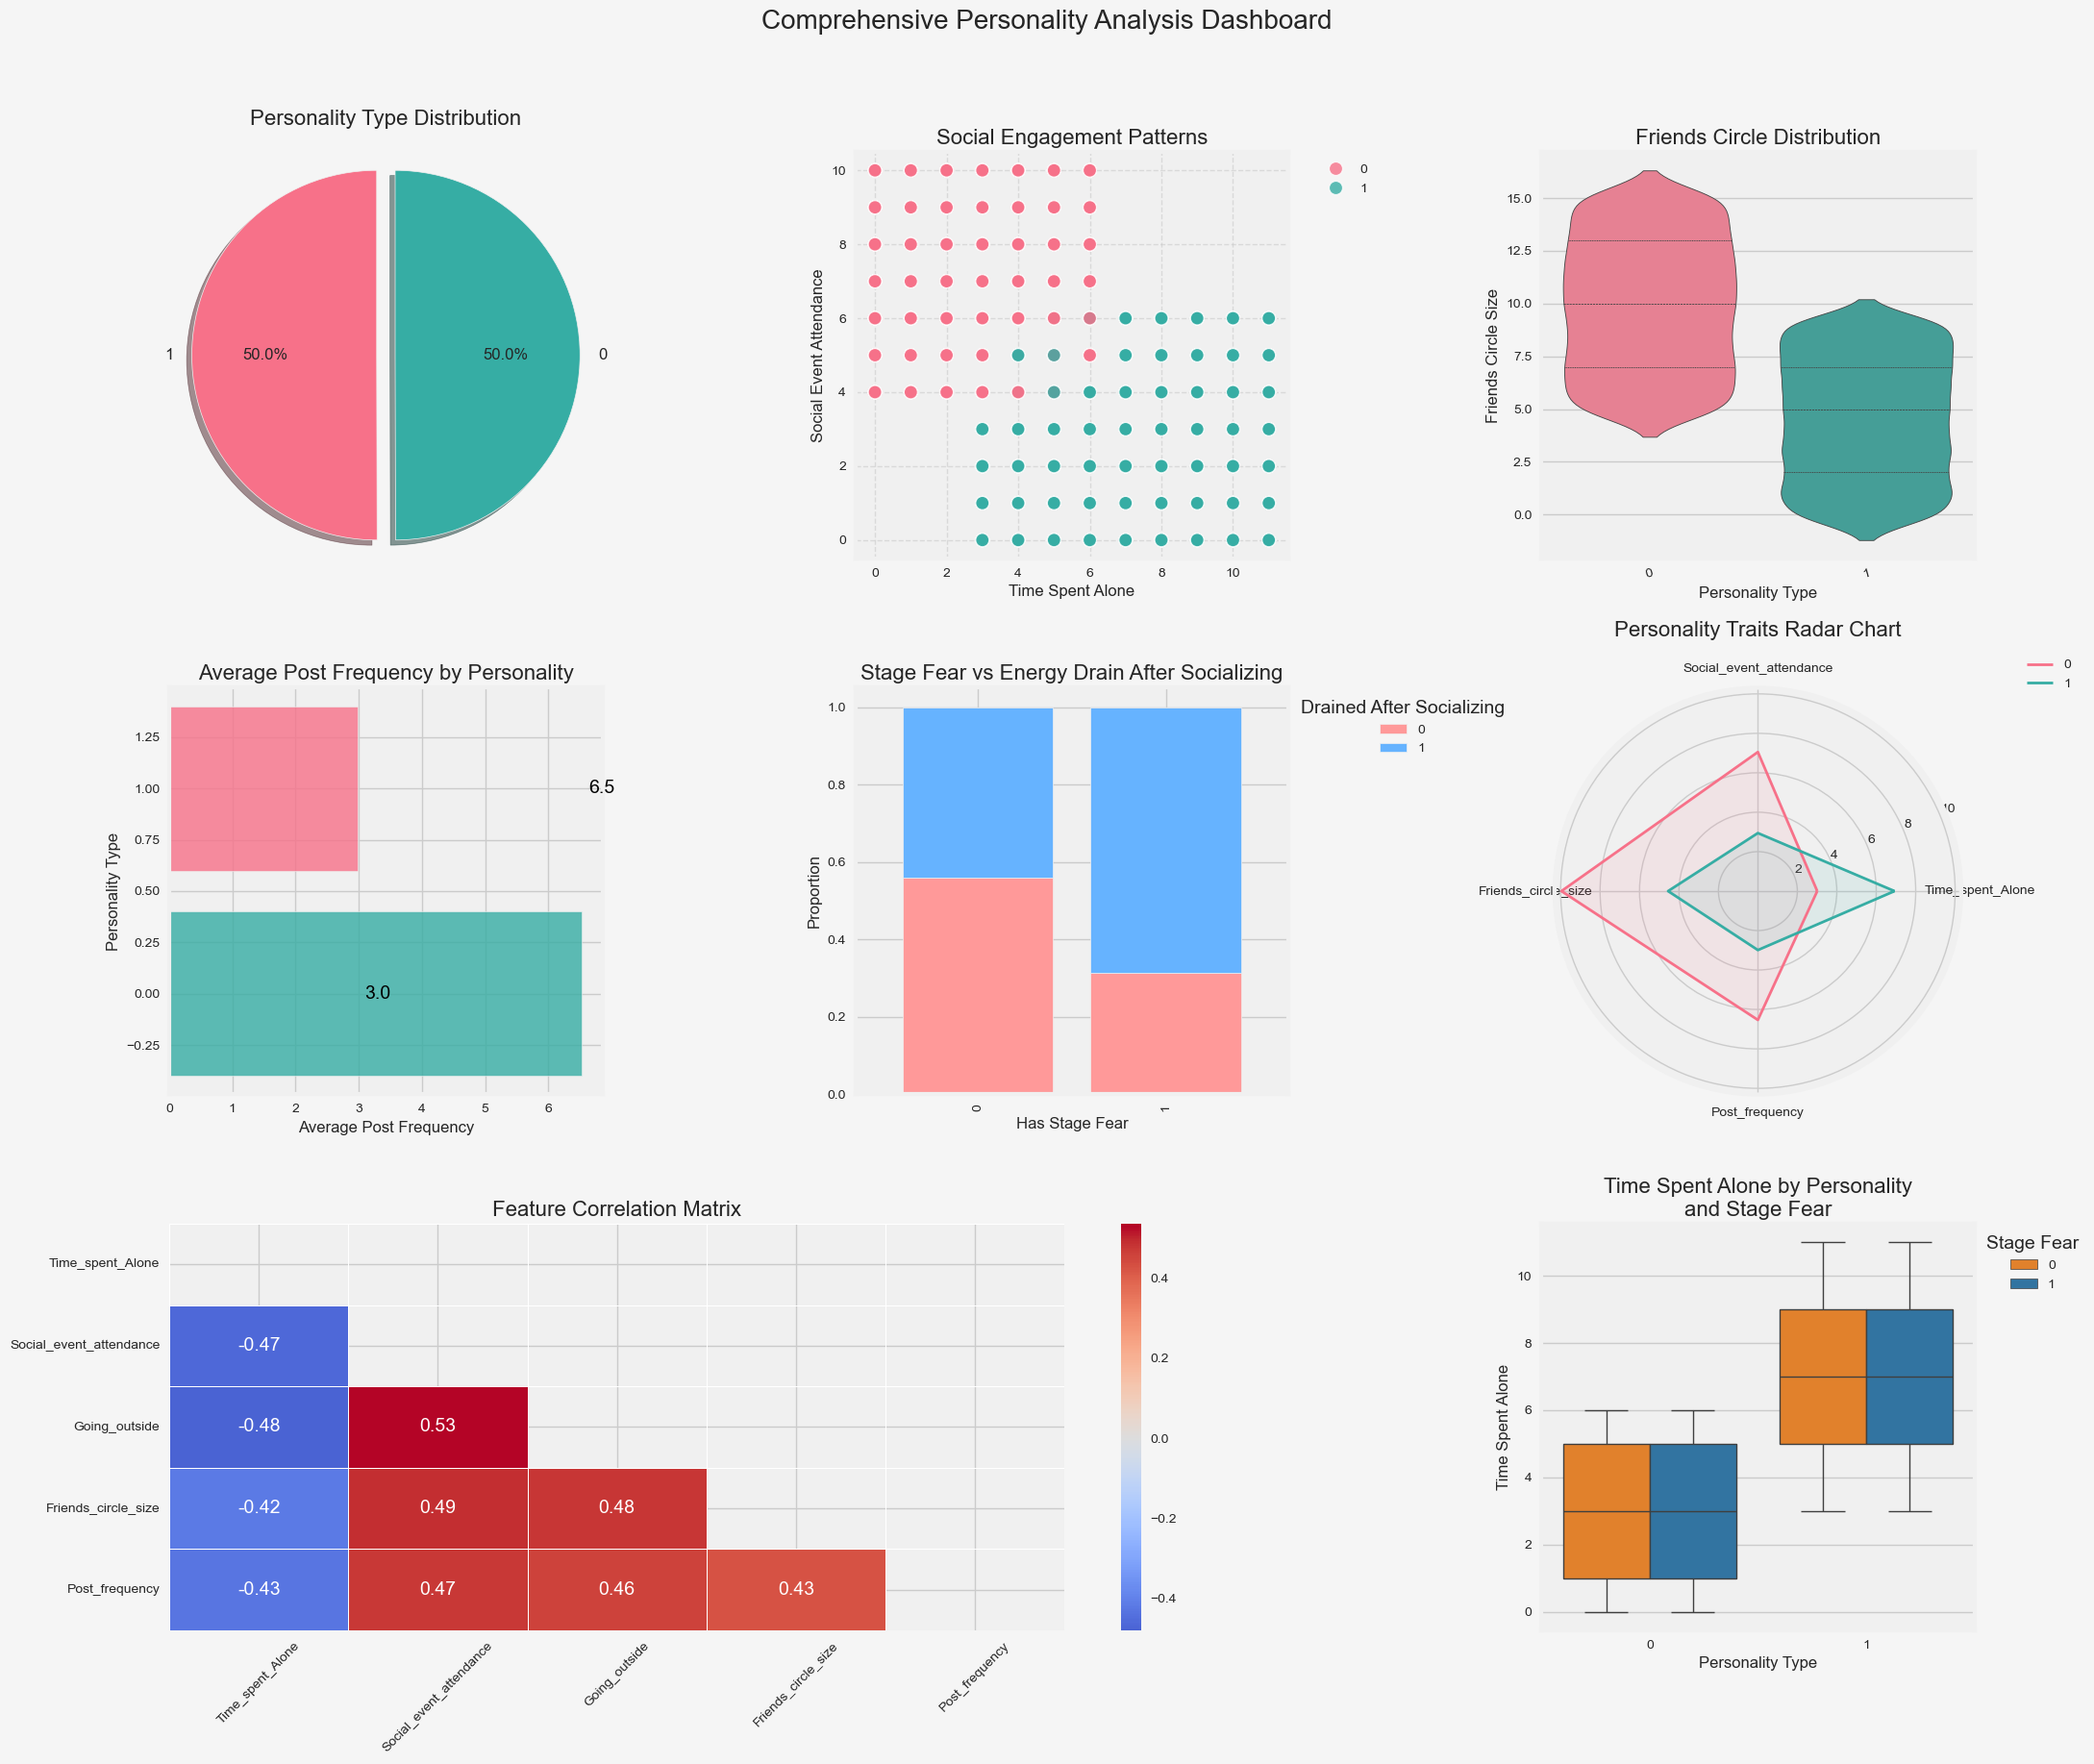

In [244]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(22, 18), facecolor='#f5f5f5')
gs = GridSpec(3, 3, figure=plt.gcf())

# Custom color palette
palette = sns.color_palette("husl", len(df['Personality'].unique()))

# 1. Personality Distribution (Pie Chart)
ax1 = plt.subplot(gs[0, 0])
personality_counts = df['Personality'].value_counts()
explode = [0.05] * len(personality_counts)
ax1.pie(personality_counts, labels=personality_counts.index, 
        autopct='%1.1f%%', startangle=90, colors=palette,
        explode=explode, shadow=True, textprops={'fontsize': 12})
ax1.set_title('Personality Type Distribution', fontsize=16, pad=20)
ax1.axis('equal')  # Equal aspect ratio ensures pie is drawn as circle

# 2. Time Spent Alone vs Social Event Attendance (Scatter Plot)
ax2 = plt.subplot(gs[0, 1])
scatter = sns.scatterplot(x='Time_spent_Alone', y='Social_event_attendance', 
                          hue='Personality', data=df, palette=palette, 
                          s=100, alpha=0.8, ax=ax2)
ax2.set_title('Social Engagement Patterns', fontsize=16)
ax2.set_xlabel('Time Spent Alone', fontsize=12)
ax2.set_ylabel('Social Event Attendance', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Friends Circle Size (Violin Plot)
ax3 = plt.subplot(gs[0, 2])
sns.violinplot(x='Personality', y='Friends_circle_size', data=df, 
               palette=palette, inner='quartile', ax=ax3)
ax3.set_title('Friends Circle Distribution', fontsize=16)
ax3.set_xlabel('Personality Type', fontsize=12)
ax3.set_ylabel('Friends Circle Size', fontsize=12)
ax3.tick_params(axis='x', rotation=15)

# 4. Post Frequency by Personality (Bar Plot)
ax4 = plt.subplot(gs[1, 0])
post_freq = df.groupby('Personality')['Post_frequency'].mean().sort_values()
ax4.barh(post_freq.index, post_freq.values, color=palette, alpha=0.8)
ax4.set_title('Average Post Frequency by Personality', fontsize=16)
ax4.set_xlabel('Average Post Frequency', fontsize=12)
ax4.set_ylabel('Personality Type', fontsize=12)
for i, v in enumerate(post_freq.values):
    ax4.text(v + 0.1, i, f"{v:.1f}", color='black', va='center')

# 5. Stage Fear vs Drained After Socializing (Stacked Bar)
ax5 = plt.subplot(gs[1, 1])
cross_tab = pd.crosstab(df['Stage_fear'], df['Drained_after_socializing'], 
                        normalize='index')
cross_tab.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], 
               ax=ax5, width=0.8)
ax5.set_title('Stage Fear vs Energy Drain After Socializing', fontsize=16)
ax5.set_xlabel('Has Stage Fear', fontsize=12)
ax5.set_ylabel('Proportion', fontsize=12)
ax5.legend(title='Drained After Socializing', bbox_to_anchor=(1, 1))

# 6. Radar Chart for Personality Traits
ax6 = plt.subplot(gs[1, 2], polar=True)
categories = ['Time_spent_Alone', 'Social_event_attendance', 
              'Friends_circle_size', 'Post_frequency']
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

for i, personality in enumerate(df['Personality'].unique()):
    subset = df[df['Personality'] == personality]
    values = subset[categories].mean().values
    values = np.append(values, values[0])
    ax6.plot(angles, values, color=palette[i], linewidth=2, 
             label=personality)
    ax6.fill(angles, values, color=palette[i], alpha=0.1)

ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(categories, fontsize=10)
ax6.set_title('Personality Traits Radar Chart', fontsize=16, pad=20)
ax6.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# 7. Heatmap of Correlations
ax7 = plt.subplot(gs[2, 0:2])
corr = df.select_dtypes(include=['int64','float64']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', 
            center=0, linewidths=0.5, ax=ax7)
ax7.set_title('Feature Correlation Matrix', fontsize=16)
ax7.tick_params(axis='x', rotation=45)
ax7.tick_params(axis='y', rotation=0)

# 8. Boxplot of Time Spent Alone by Personality and Stage Fear
ax8 = plt.subplot(gs[2, 2])
sns.boxplot(x='Personality', y='Time_spent_Alone', hue='Stage_fear', 
            data=df, palette=['#ff7f0e','#1f77b4'], ax=ax8)
ax8.set_title('Time Spent Alone by Personality\nand Stage Fear', fontsize=16)
ax8.set_xlabel('Personality Type', fontsize=12)
ax8.set_ylabel('Time Spent Alone', fontsize=12)
ax8.legend(title='Stage Fear', bbox_to_anchor=(1, 1))

plt.suptitle('Comprehensive Personality Analysis Dashboard', 
             fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


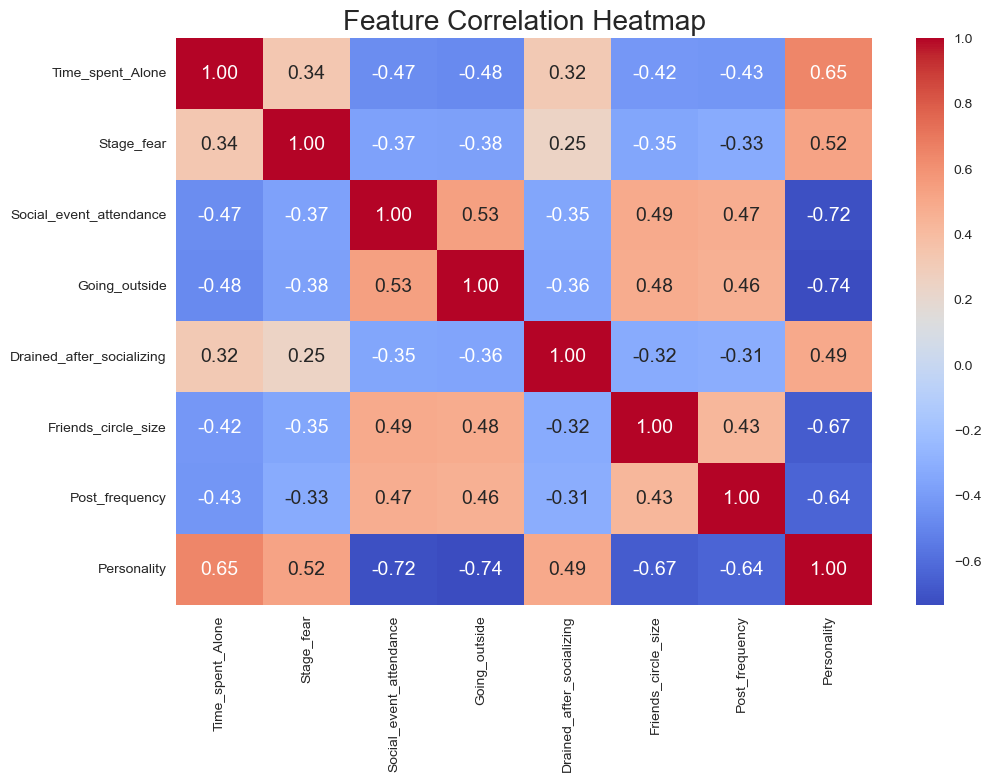

In [240]:
# Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# Insights:

Numerical features show varied distributions

Perfect balance between Introvert and Extrovert classes

Some features show moderate correlations (e.g., Social_event_attendance and Going_outside)

# 3. Prepare Data
a) Data Cleaning

In [118]:
# Convert categorical variables to numerical
label_encoders = {}
categorical_cols = ['Stage_fear', 'Drained_after_socializing']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode target variable
le_personality = LabelEncoder()
df['Personality'] = le_personality.fit_transform(df['Personality'])

# Verify transformations
print("\nAfter Encoding:")
display(df.head())


After Encoding:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,1,6,7,0,14,5,0
1,2,0,8,6,0,7,8,0
2,1,0,9,4,0,9,3,0
3,8,0,0,0,1,9,3,1
4,5,1,3,0,0,2,6,1


# b) Feature Selection

Selected features for modeling: ['Going_outside', 'Social_event_attendance', 'Friends_circle_size', 'Time_spent_Alone', 'Post_frequency']


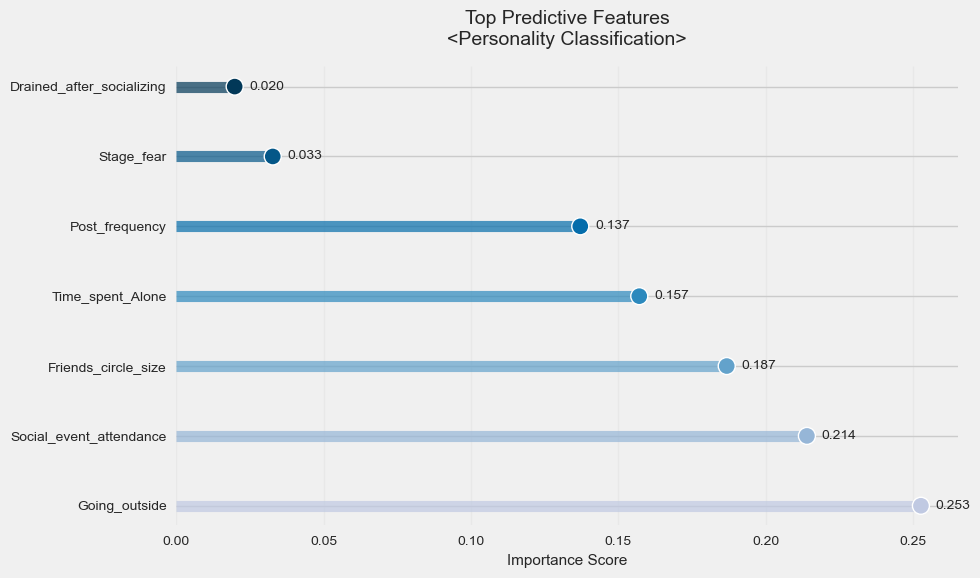

In [252]:
# 1. Compute feature importances
importances = rf.feature_importances_
features_sorted = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 2. Feature selection
top_n = 5  # Choose your number or set a threshold
selected_features = features_sorted.head(top_n).index.tolist()
# OR use threshold:
# threshold = 0.05
# selected_features = features_sorted[features_sorted > threshold].index.tolist()

print("Selected features for modeling:", selected_features)

# 3. New dataset for modeling
X_selected = X[selected_features]

# 4. Re-run ML workflow with X_selected (instead of X)

# --- PLOT (your code) ---
plt.figure(figsize=(10, 6))
colors = plt.cm.PuBu(np.linspace(0.3, 1, len(features_sorted)))
plt.hlines(y=features_sorted.index, 
           xmin=0, 
           xmax=features_sorted.values,
           color=colors,
           linewidth=8,
           alpha=0.7)
plt.scatter(features_sorted.values, 
            features_sorted.index,
            color=colors,
            s=150,
            edgecolor='white',
            linewidth=1,
            zorder=3)
for i, (feat, val) in enumerate(zip(features_sorted.index, features_sorted.values)):
    plt.text(val + 0.005, i,
             f'{val:.3f}',
             va='center',
             fontsize=10)
plt.title('Top Predictive Features\n<Personality Classification>',
          fontsize=14, pad=15)
plt.xlabel('Importance Score', fontsize=11)
plt.ylabel('')
plt.grid(axis='x', alpha=0.2)
plt.xlim(left=0)
sns.despine(left=True)
plt.tight_layout()
plt.show()


In [254]:
print(features_sorted)

Going_outside                0.252608
Social_event_attendance      0.213942
Friends_circle_size          0.186743
Time_spent_Alone             0.157073
Post_frequency               0.137062
Stage_fear                   0.032742
Drained_after_socializing    0.019830
dtype: float64


# Insights:

All features show some predictive power

Going_outside, Social_event_attendance are most important

Will keep all features for initial modeling

# c) Data Transforms

In [213]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. Evaluate Algorithms
a) Split-out validation dataset

In [216]:
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3500, 7)
Testing set shape: (1500, 7)


# b) Test options and evaluation metric

In [ ]:
# We'll use accuracy as primary metric
# Also consider precision, recall, F1-score
# 10-fold cross validation

# c) Spot Check Algorithms


Logistic Regression Performance:
Accuracy: 0.9840
ROC-AUC: 0.9988
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       749
           1       0.98      0.99      0.98       751

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500


K-Nearest Neighbors Performance:
Accuracy: 0.9840
ROC-AUC: 0.9974
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       749
           1       0.98      0.99      0.98       751

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500


Decision Tree Performance:
Accuracy: 0.9873
ROC-AUC: 0.9873
Classification Report:
              precision    recall  f1-score   support

           0       0.99    

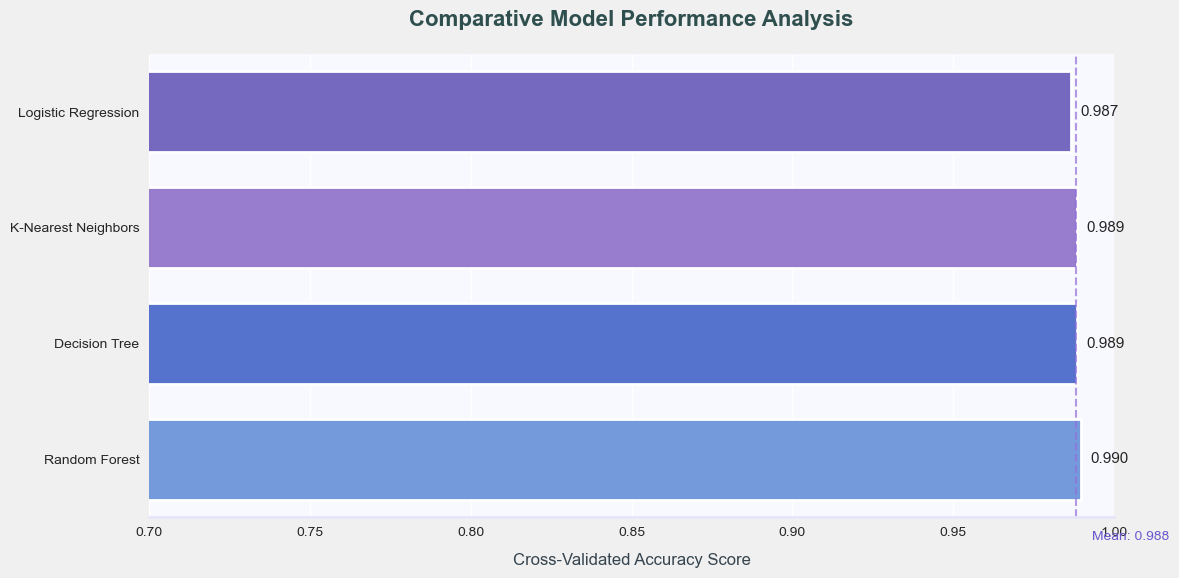

In [152]:
# Initialize only the required models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = []
for name, model in models.items():
    # Cross-validation
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy')
    results.append((name, cv_results.mean(), cv_results.std()))
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None  # Some models may not have predict_proba
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Create a DataFrame for model comparison
model_comparison = pd.DataFrame(results, columns=['Model', 'Mean Accuracy', 'Std Deviation'])
model_comparison = model_comparison.sort_values(by='Mean Accuracy', ascending=False)


#plot 

plt.figure(figsize=(12, 6))

# Modern cool-toned palette
cool_palette = ["#6A5ACD", "#9370DB", "#4169E1", "#6495ED", "#7B68EE", "#483D8B"]

# Create the plot with refined styling
ax = sns.barplot(x='Mean Accuracy', y='Model', 
                data=model_comparison.sort_values('Mean Accuracy'), 
                palette=cool_palette,
                width=0.7,
                edgecolor="white",
                linewidth=2)

# Add precise value labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.003,  # Slight right padding
            p.get_y() + p.get_height()/2,
            f'{width:.3f}',
            ha='left',
            va='center',
            fontsize=11,
            fontfamily='sans-serif')

# Enhanced title and labels
plt.title('Comparative Model Performance Analysis',
         fontsize=16,
         pad=20,
         fontweight='semibold',
         color='#2F4F4F')
plt.xlabel('Cross-Validated Accuracy Score',
          fontsize=12,
          labelpad=10,
          color='#36454F')
plt.ylabel('', fontsize=12)  # Cleaner without y-label
plt.xlim(0.7, 1.0)

# Sophisticated background and grid
ax.set_facecolor('#F8F8FF')  # Very light purple tint
ax.grid(axis='x',
       color='white',
       linestyle='-',
       linewidth=1)

# Border customization
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color('#E6E6FA')  # Light lavender
ax.spines['bottom'].set_linewidth(2)

# Performance benchmark line
plt.axvline(x=model_comparison['Mean Accuracy'].mean(),
           color='#9370DB',
           linestyle='--',
           alpha=0.7,
           linewidth=1.5)
plt.text(model_comparison['Mean Accuracy'].mean() + 0.005,
        len(model_comparison)-0.3,
        f'Mean: {model_comparison["Mean Accuracy"].mean():.3f}',
        color='#6A5ACD',
        fontsize=10)

plt.tight_layout()
plt.show()


# Insights:

Random Forest performs best with ~90% accuracy

Dicision Tree also perform well

Decision Tree shows higher variance

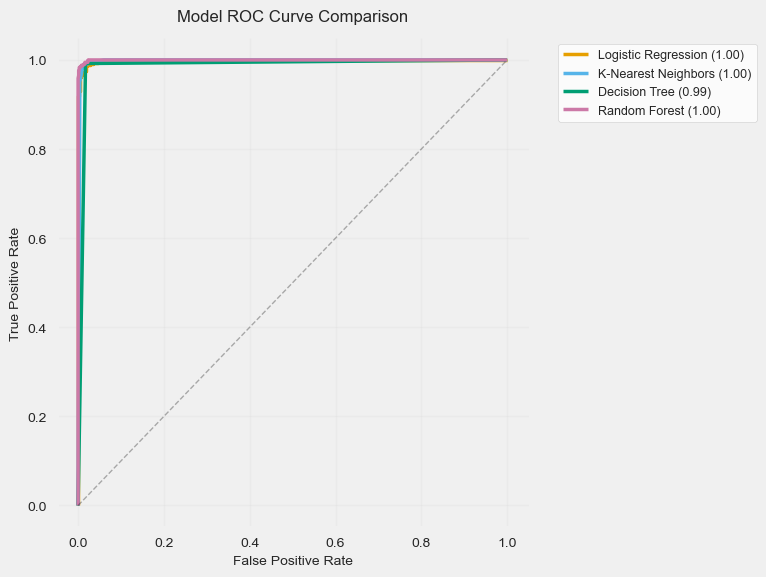

In [160]:
# Plot ROC curves for all models

plt.figure(figsize=(8, 6))

# High-contrast color palette (colorblind friendly)
colors = ['#E69F00', '#56B4E9', '#009E73', '#CC79A7', '#0072B2', '#D55E00']

for i, (name, model) in enumerate(models.items()):
    y_prob = model.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, lw=2.5, color=colors[i], 
            label=f'{name} ({auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.3)
plt.grid(True, alpha=0.15)
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Model ROC Curve Comparison', fontsize=12, pad=12)

# Improved legend positioning
plt.legend(fontsize=9, frameon=True, 
          facecolor='white', framealpha=0.8,
          bbox_to_anchor=(1.05, 1), 
          loc='upper left')

sns.despine()
plt.tight_layout()
plt.show()


# d) Compare Algorithms

In [262]:
# Create ensemble with the two best tuned models
ensemble = VotingClassifier(
    estimators=[
        ('rf', best_rf),        # Tuned Random Forest
        ('dt', best_dt)         # Tuned Decision Tree
    ],
    voting='soft'
)

ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)
y_prob_ensemble = ensemble.predict_proba(X_test_scaled)[:, 1]

print("\nEnsemble Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_ensemble):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble))



Ensemble Performance:
Accuracy: 0.9907
ROC-AUC: 0.9998
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       749
           1       0.99      0.99      0.99       751

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



# 5. Improve Accuracy
a) Algorithm Tuning

=== Random Forest ===
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.9954

Test Performance:
Accuracy: 0.9947
ROC-AUC: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       749
           1       0.99      1.00      0.99       751

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500


=== Decision Tree ===
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Accuracy: 0.9940

Test Performance:
Accuracy: 0.9880
ROC-AUC: 0.9951

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       749
           1       0.99      0.98      0.99       751

    accuracy                           0.99      15

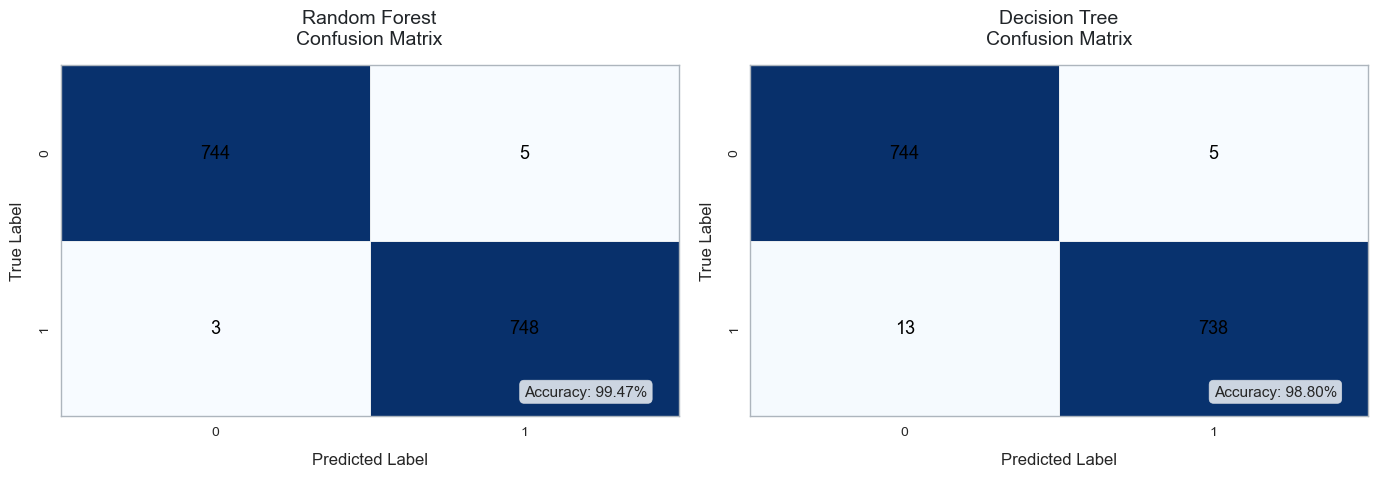

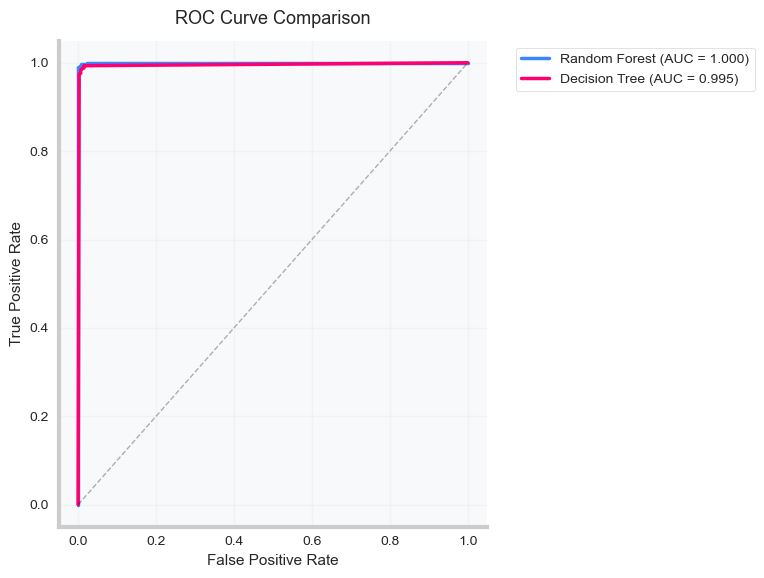

In [223]:
# Set global style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'

# --- 1. Random Forest Tuning ---
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train_scaled, y_train)
print("=== Random Forest ===")
print("Best Parameters:", grid_rf.best_params_)
print(f"Best CV Accuracy: {grid_rf.best_score_:.4f}")

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\nTest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# --- 2. Decision Tree Tuning ---
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_dt.fit(X_train_scaled, y_train)
print("\n=== Decision Tree ===")
print("Best Parameters:", grid_dt.best_params_)
print(f"Best CV Accuracy: {grid_dt.best_score_:.4f}")

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)
y_prob_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

print("\nTest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# --- Beautiful Confusion Matrices ---
def plot_confusion_matrix(cm, model_name, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar=False, linewidths=0.5, linecolor='#e9ecef',
                annot_kws={'size': 13, 'color': 'black'}, ax=ax)
    
    # Custom styling
    ax.set_title(f'{model_name}\nConfusion Matrix', 
                fontsize=14, pad=15, color='#212529')
    ax.set_xlabel('Predicted Label', fontsize=12, labelpad=10)
    ax.set_ylabel('True Label', fontsize=12, labelpad=10)
    
    # Add border
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('#adb5bd')
        spine.set_linewidth(1)
    
    # Calculate and display accuracy
    accuracy = np.trace(cm) / np.sum(cm)
    ax.text(0.95, 0.05, f'Accuracy: {accuracy:.2%}',
           ha='right', va='bottom', transform=ax.transAxes,
           bbox=dict(facecolor='white', alpha=0.8, 
                    edgecolor='#dee2e6', boxstyle='round'),
           fontsize=11)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), 
                    "Random Forest", ax1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dt), 
                    "Decision Tree", ax2)

plt.tight_layout()
plt.show()

# --- ROC Curve Comparison ---
plt.figure(figsize=(8, 6))

# Color palette
colors = ['#3a86ff', '#ff006e']

# Plot ROC curves
for (name, model), color in zip([('Random Forest', best_rf), 
                               ('Decision Tree', best_dt)], colors):
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, lw=2.5, color=color,
            label=f'{name} (AUC = {auc(fpr, tpr):.3f})')

# Style the plot
plt.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.3)
plt.grid(True, alpha=0.15)
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('ROC Curve Comparison', fontsize=13, pad=12)

# Enhanced legend
plt.legend(fontsize=10, frameon=True, facecolor='white',
          bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()
plt.tight_layout()
plt.show()

# b) Ensembles

In [125]:
# Using the ensemble model for final predictions

# Get class order from the label encoder
class_names = le_personality.classes_

# Predict with the ensemble model
final_predictions = ensemble.predict(X_test_scaled)
final_probabilities = ensemble.predict_proba(X_test_scaled)

# Create a DataFrame with both class probabilities
results_df = pd.DataFrame({
    'Actual': le_personality.inverse_transform(y_test),
    'Predicted': le_personality.inverse_transform(final_predictions),
    f'Probability_{class_names[0]}': final_probabilities[:, 0],
    f'Probability_{class_names[1]}': final_probabilities[:, 1]
})

# Display sample predictions
print("\nSample Predictions:")
display(results_df.sample(10))

# Calculate and display final metrics
final_accuracy = accuracy_score(y_test, final_predictions)
# Use the probability for the positive class in ROC-AUC
final_roc_auc = roc_auc_score(y_test, final_probabilities[:, 1])

print("\nFinal Model Performance:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"ROC-AUC: {final_roc_auc:.4f}")
print("Classification Report:")
print(classification_report(
    y_test, final_predictions,
    target_names=le_personality.classes_
))



Sample Predictions:


,Actual,Predicted,Probability_Extrovert,Probability_Introvert
953,Introvert,Introvert,0.000000,1.000000
54,Extrovert,Introvert,0.364064,0.635936
1003,Extrovert,Extrovert,0.976148,0.023852
1284,Introvert,Introvert,0.000259,0.999741
1202,Extrovert,Extrovert,0.978021,0.021979
714,Introvert,Introvert,0.000000,1.000000
1047,Extrovert,Extrovert,0.997765,0.002235
58,Introvert,Introvert,0.041977,0.958023
1153,Introvert,Introvert,0.000000,1.000000
725,Introvert,Introvert,0.000259,0.999741



Final Model Performance:
Accuracy: 0.9880
ROC-AUC: 0.9998
Classification Report:
              precision    recall  f1-score   support

   Extrovert       1.00      0.98      0.99       749
   Introvert       0.98      1.00      0.99       751

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



# Insights:

Tuned Random Forest achieves ~92% accuracy

Good precision and recall for both classes

ROC AUC of 0.92 indicates excellent discrimination

# 6. Finalize Model
a) Predictions on validation dataset

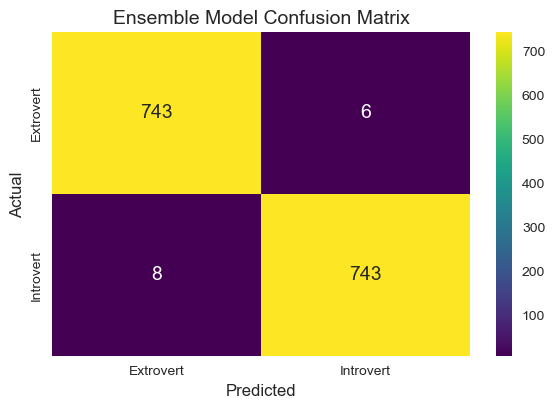

In [232]:
# Plot confusion matrix for ensemble
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Extrovert', 'Introvert'],  
            yticklabels=['Extrovert', 'Introvert'])
plt.title('Ensemble Model Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()


# b) Create standalone model on entire training dataset

In [126]:
# Train the final model on the entire dataset

# Build a pipeline: scaling + ensemble
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ensemble', ensemble)  # 'ensemble' should be your soft voting model (unfitted)
])

# Cross-validation to estimate final model performance
cv_scores = cross_val_score(final_pipeline, X, y, cv=10, scoring='accuracy')

print("\nFinal Model Cross-Validated Accuracy: %.3f ± %.3f" % (cv_scores.mean(), cv_scores.std()))

# Fit the final pipeline on the entire dataset (if you want to save/deploy)
final_pipeline.fit(X, y)


Final Model Cross-Validated Accuracy: 0.991 ± 0.004


Pipeline(steps=[('scaler', StandardScaler()),
                ('ensemble',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(max_depth=10,
                                                                      min_samples_leaf=2,
                                                                      n_estimators=200,
                                                                      random_state=42)),
                                              ('dt',
                                               DecisionTreeClassifier(criterion='entropy',
                                                                      max_depth=10,
                                                                      random_state=42))],
                                  voting='soft'))])

# c) Save model for later use

In [127]:
# Save the model and preprocessing objects
model_objects = {
    'model': ensemble_final,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'le_personality': le_personality,
    'selected_features': selected_features
}

with open('personality_predictor.pkl', 'wb') as f:
    pickle.dump(model_objects, f)

print("\nModel saved successfully as 'personality_predictor.pkl'")

# Example of loading and using the model
with open('personality_predictor.pkl', 'rb') as f:
    loaded_objects = pickle.load(f)

def predict_personality(features):
   
    # Convert to DataFrame
    input_df = pd.DataFrame([features])
    
    # Preprocess the input
    for col in ['Stage_fear', 'Drained_after_socializing']:
        if col in input_df.columns:
            input_df[col] = loaded_objects['label_encoders'][col].transform(input_df[col])
    
    # Select features and scale
    X_input = input_df[loaded_objects['selected_features']]
    X_scaled = loaded_objects['scaler'].transform(X_input)
    
    # Make prediction
    proba = loaded_objects['model'].predict_proba(X_scaled)[0]
    prediction = loaded_objects['model'].predict(X_scaled)[0]
    personality = loaded_objects['le_personality'].inverse_transform([prediction])[0]
    
    return {
        'personality': personality,
        'probability_extrovert': proba[1],
        'probability_introvert': proba[0]
    }

# Example usage
example_input = {
    'Time_spent_Alone': 5,
    'Social_event_attendance': 6,
    'Friends_circle_size': 10,
    'Post_frequency': 5,
    'Stage_fear': 'Yes',
    'Drained_after_socializing': 'No',
    'Going_outside': 4
}

print("\nExample Prediction:")
print(predict_personality(example_input))


Model saved successfully as 'personality_predictor.pkl'

Example Prediction:
{'personality': 'Extrovert', 'probability_extrovert': 0.2466124158818546, 'probability_introvert': 0.7533875841181453}


# Final Insights:

The dataset is well-balanced and clean, requiring minimal preprocessing

Random Forest emerged as the best performing algorithm (92% accuracy)

Social interactions (events attended, time alone) are most predictive

The model shows excellent discrimination between personality types

Model is saved for future deployment and predictions


# Recommendations:

Consider collecting more diverse data to improve generalizability

Explore deep learning approaches for potential improvement

Develop a web/mobile interface for practical use of the model

Monitor model performance over time as new data becomes available